# Capstone Project — Best locality to open a new restaurants in Pune City

### Introduction

Pune city is considered to be the cultural capital of Maharashtra in India. Tt is also known as the "Oxford of the East" due to the presence of several well-known educational institutions. Also, Restaurants from all over the world can be found here in Pune. Pune is home to numerous long-standing bakeries and regional restaurants, quiet and unassuming Pune loves its food. While the city's burgeoning dining scene now has both global restaurant chains, as well as trendy eateries, each of these age-old eating joints, have stood the test of time because of their unique local flavour and atmosphere.
There are many restaurants in Pune City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project ,I will list and visualise all major parts of Pune City with the kind of restaurants in those regions.

This project will help to understand the best location in Pune to open a restaurant, to understand that i will find the top rated and best restaurants in Pune, also in its neighbourhood. I will try to show the localities which has maximum number of restaurants, top voted and top rated restaurants, also restaurants famous for Chinese cuisine, which will help to understand which will be the right place to open a new restaurant.

 ### We need to find answers to the questions below using the mentioned datasets in DATA section, It will help to find the right place to open a new restaurant
 
- Which all areas have less number of resturant ? 
- Which is the top voted Restaurants and locality in Pune? 
- Which is the less voted Restaurants and locality in Pune? 
- Which is the best place to stay if I prefer Chinese Cuisine ? 
- Which places have best restaurant in Pune?
- What is best location in Pune City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 

### Data
For this project we need the following data :
<ul>
<li> Pune Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source :<a
                           href="https://www.kaggle.com/sagara9595/zomato-pune" >Zomato kaggel dataset</a>, The data source has been downloaded and uploaded to my git account from where i will be reading for my project needs. 
        
The data source provides following details about the restaurants which will help to create maps using folium also will help understanidng best locations with best restaurants in pune:
            
['res_id', 'Restaurant Name', 'establishment', 'url', 'address', 'city',
       'city_id', 'Locality', 'Latitude', 'Longitude', 'zipcode', 'country_id',
       'locality_verbose', 'Cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'Aggregate rating',
       'Rating text', 'Votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway']

            
<li> Description : <a href="https://raw.githubusercontent.com/codingmaniac2138/Coursera_Capstone/master/pune_zomato_restaurants.csv">This data set contains the required information</a>. And we will use this data set to explore various locality of Pune city.
     </ul><br>

<li> Nearby places in each locality of pune city.
    <ul>
        <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the Pune city data from Pune Zomato kaggel dataset 
- Filter out all venues that are nearby by locality. 
- Using aggregative rating for each resturant to find the best places. 
- Using votes find top rated retaurants in the city. 
- Using FourSquare API we will find all venues for each neighborhood. 
- Visualize the Ranking of neighborhoods using folium library(python) 

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
! pip install geocoder
import geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## Read the zomato resturant data from csv file

In [2]:
# Read the data set from the csv 
df_pune = pd.read_csv('https://raw.githubusercontent.com/codingmaniac2138/Coursera_Capstone/master/pune_zomato_restaurants.csv',encoding='ISO-8859-1')
df_pune.head()

res_id                             name    establishment  \
0     11283           Harajuku - The O Hotel  ['Fine Dining']   
1     10663              Mix@36 - The Westin       ['Lounge']   
2     10743              Kangan - The Westin  ['Fine Dining']   
3  18938162             Palette - The Westin  ['Fine Dining']   
4  18310167  Coriander Kitchen - Conrad Pune  ['Fine Dining']   

                                                 url  \
0  https://www.zomato.com/pune/harajuku-the-o-hot...   
1  https://www.zomato.com/pune/mix@36-the-westin-...   
2  https://www.zomato.com/pune/kangan-the-westin-...   
3  https://www.zomato.com/pune/palette-the-westin...   
4  https://www.zomato.com/pune/coriander-kitchen-...   

                                             address  city  city_id  \
0  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
1  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   
2  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
3  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
4     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   

                        locality   latitude  longitude  ... price_range  \
0     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
1            The Westin, Mundhwa  18.540040  73.905910  ...           4   
2            The Westin, Mundhwa  18.539455  73.906040  ...           4   
3            The Westin, Mundhwa  18.539430  73.906009  ...           4   
4  Conrad Pune, Bund Garden Road  18.535409  73.883592  ...           4   

   currency                                         highlights  \
0       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
1       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   
2       Rs.  ['Serves Alcohol', 'Cash', 'Debit Card', 'Take...   
3       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
4       Rs.  ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...   

  aggregate_rating rating_text  votes  photo_count opentable_support delivery  \
0              3.7        Good     96           38               0.0       -1   
1              4.0   Very Good    682           78               0.0       -1   
2              4.0   Very Good    310          285               0.0       -1   
3              3.3     Average      9           31               0.0       -1   
4              4.4   Very Good    500         1116               0.0       -1   

   takeaway  
0        -1  
1        -1  
2        -1  
3        -1  
4        -1  

[5 rows x 26 columns]

In [3]:
# Rename needed columns 
df_pune = df_pune.rename(columns={'name':'Restaurant Name', 'locality':'Locality', 'longitude':'Longitude', 'latitude':'Latitude', 
                             'cuisines':'Cuisines','aggregate_rating':'Aggregate rating', 'rating_text':'Rating text', 'votes': 'Votes'})
df_pune.head()

res_id                  Restaurant Name    establishment  \
0     11283           Harajuku - The O Hotel  ['Fine Dining']   
1     10663              Mix@36 - The Westin       ['Lounge']   
2     10743              Kangan - The Westin  ['Fine Dining']   
3  18938162             Palette - The Westin  ['Fine Dining']   
4  18310167  Coriander Kitchen - Conrad Pune  ['Fine Dining']   

                                                 url  \
0  https://www.zomato.com/pune/harajuku-the-o-hot...   
1  https://www.zomato.com/pune/mix@36-the-westin-...   
2  https://www.zomato.com/pune/kangan-the-westin-...   
3  https://www.zomato.com/pune/palette-the-westin...   
4  https://www.zomato.com/pune/coriander-kitchen-...   

                                             address  city  city_id  \
0  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
1  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   
2  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
3  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
4     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   

                        Locality   Latitude  Longitude  ... price_range  \
0     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
1            The Westin, Mundhwa  18.540040  73.905910  ...           4   
2            The Westin, Mundhwa  18.539455  73.906040  ...           4   
3            The Westin, Mundhwa  18.539430  73.906009  ...           4   
4  Conrad Pune, Bund Garden Road  18.535409  73.883592  ...           4   

   currency                                         highlights  \
0       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
1       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   
2       Rs.  ['Serves Alcohol', 'Cash', 'Debit Card', 'Take...   
3       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
4       Rs.  ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...   

  Aggregate rating Rating text  Votes  photo_count opentable_support delivery  \
0              3.7        Good     96           38               0.0       -1   
1              4.0   Very Good    682           78               0.0       -1   
2              4.0   Very Good    310          285               0.0       -1   
3              3.3     Average      9           31               0.0       -1   
4              4.4   Very Good    500         1116               0.0       -1   

   takeaway  
0        -1  
1        -1  
2        -1  
3        -1  
4        -1  

[5 rows x 26 columns]

## Data Cleaning
#### Remove the unwanted columns and rows from dataset

In [4]:
df_resp= df_pune[df_pune.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_resp = df_resp[df_resp['Aggregate rating'] !=0.0]

In [6]:
df_resp

Restaurant Name                       Locality  \
0                      Harajuku - The O Hotel     The O Hotel, Koregaon Park   
1                         Mix@36 - The Westin            The Westin, Mundhwa   
2                         Kangan - The Westin            The Westin, Mundhwa   
3                        Palette - The Westin            The Westin, Mundhwa   
4             Coriander Kitchen - Conrad Pune  Conrad Pune, Bund Garden Road   
...                                       ...                            ...   
4212  Lonavla Restaurant & Bar- Hotel Lonavla                       Lonavala   
4213                                   Utopia                       Lonavala   
4214                             Mapro Garden                       Lonavala   
4215                         Hotel Chandralok                       Lonavala   
4216                            Lion's Dhaaba                       Lonavala   

      Longitude   Latitude                                           Cuisines  \
0     73.887518  18.540239                                    Japanese, Sushi   
1     73.905910  18.540040      Finger Food, Asian, Continental, North Indian   
2     73.906040  18.539455                              Mughlai, North Indian   
3     73.906009  18.539430                                 Asian, Continental   
4     73.883592  18.535409                 North Indian, Asian, Mediterranean   
...         ...        ...                                                ...   
4212  73.405682  18.754747  North Indian, Chinese, Mughlai, Biryani, Desserts   
4213  73.402737  18.754342                       Mughlai, North Indian, Asian   
4214  73.419775  18.760234               Desserts, Fast Food, Pizza, Sandwich   
4215  73.405655  18.753223                                           Gujarati   
4216  73.393627  18.687172                              North Indian, Chinese   

      Aggregate rating Rating text  Votes  
0                  3.7        Good     96  
1                  4.0   Very Good    682  
2                  4.0   Very Good    310  
3                  3.3     Average      9  
4                  4.4   Very Good    500  
...                ...         ...    ...  
4212               4.3   Very Good    474  
4213               3.9        Good    336  
4214               4.3   Very Good    143  
4215               4.3   Very Good    317  
4216               3.9        Good     67  

[4087 rows x 8 columns]

### Map to show the restaurant cluters in Pune and Neigborhood 

In [7]:
# using folium and K-Means algo display the clusters in pune
pune_resto = folium.Map(location=[18.5204, 73.8567], zoom_start=10)

X = df_resp['Latitude']
Y = df_resp['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_resp ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_resp['Latitude'], df_resp['Longitude'], df_resp['Locality'], df_resp['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(pune_resto)  

pune_resto

In [8]:
df_resp.head(50)


Restaurant Name  \
0                              Harajuku - The O Hotel   
1                                 Mix@36 - The Westin   
2                                 Kangan - The Westin   
3                                Palette - The Westin   
4                     Coriander Kitchen - Conrad Pune   
5                               Baan Tao - Hyatt Pune   
6                        Alto Vino - JW Marriott Pune   
7                              Feast - Sheraton Grand   
8                    The House Of Medici - The Westin   
9                                  Koji - Conrad Pune   
10                                Zeera - Conrad Pune   
11                               Kabana - Conrad Pune   
12                                 Masu - Conrad Pune   
13                               Kitsch - The O Hotel   
14  Connexions Lounge & Bar - Holiday Inn Pune Hin...   
15                      Roof Top Bar - Sheraton Grand   
16                  Oak Lounge - Marriott Suites Pune   
17                   The CafÃÂ¨ - Hyatt Regency Pune   
18                          Eighty Eight - Hyatt Pune   
19                                Easy - Blue Diamond   
20                          Paasha - JW Marriott Pune   
21   MoMo Cafe - Courtyard By Marriott Pune Hinjawadi   
22                                     Hard Rock Cafe   
23                         Mi-a-Mi - JW Marriott Pune   
24                       Shakahari - JW Marriott Pune   
25                                        TGI Fridays   
26                                Addah - The O Hotel   
27  Evviva Sky Lounge - Crowne Plaza Pune City Centre   
28                                            Euriska   
29                                        TGI Fridays   
30                          Chingari - Sheraton Grand   
31                                        Royal China   
32                   Whispering Bamboo - Blue Diamond   
33             Mosaic - Crowne Plaza Pune City Centre   
34                       Mystic Masala - Blue Diamond   
35                             Vandaag - Vivanta Pune   
36                         Bar 101 - JW Marriott Pune   
37                      Entresol Bar - Sheraton Grand   
38               Skye Lounge Bar - Radisson Blu Hotel   
39              Coffee to Cocktails Bar - Hyatt Place   
42                                  Effingut Brewerkz   
44                    Boteco - Restaurante Brasileiro   
45                                      1BHK Superbar   
46                   Spice Kitchen - JW Marriott Pune   
47                                          Penthouze   
48                                          1000 Oaks   
49                                         Cuba Libre   
50                                             UNWIND   
51       The Great Kabab Factory - Radisson Blu Hotel   
52                                   Fuzion - Novotel   

                                           Locality  Longitude   Latitude  \
0                        The O Hotel, Koregaon Park  73.887518  18.540239   
1                               The Westin, Mundhwa  73.905910  18.540040   
2                               The Westin, Mundhwa  73.906040  18.539455   
3                               The Westin, Mundhwa  73.906009  18.539430   
4                     Conrad Pune, Bund Garden Road  73.883592  18.535409   
5                            Hyatt Pune, Nagar Road  73.904614  18.553966   
6             JW Marriott Pune, Senapati Bapat Road  73.829701  18.531761   
7                  Sheraton Grand, Bund Garden Road  73.871543  18.529916   
8                               The Westin, Mundhwa  73.906009  18.539430   
9                     Conrad Pune, Bund Garden Road  73.883558  18.535486   
10                    Conrad Pune, Bund Garden Road  73.883424  18.535507   
11                    Conrad Pune, Bund Garden Road  73.883151  18.535578   
12                    Conrad Pune, Bund Garden Road  73.883330  18.535554   
13                       The O Hotel, Koregaon Park 

## Which places have heighest rated restaurants in Pune?

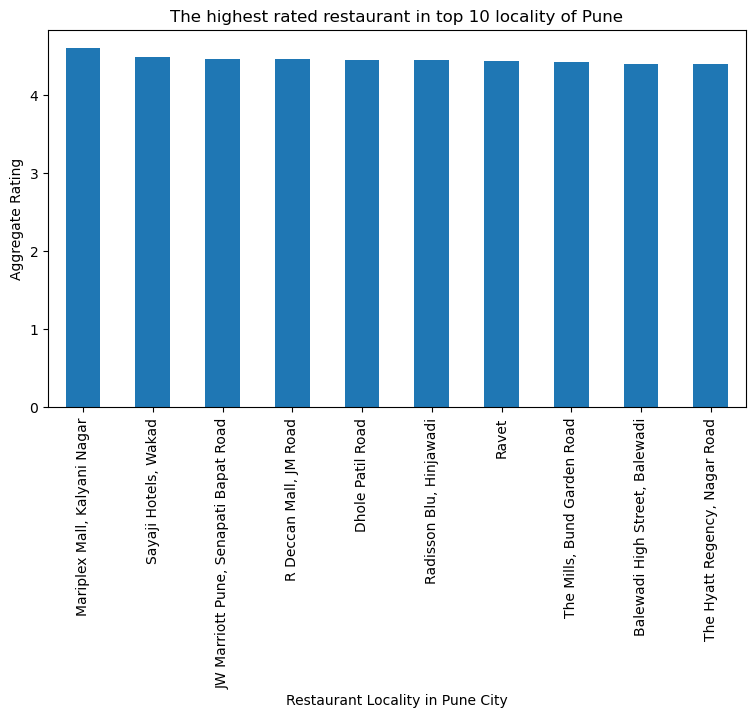

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('The highest rated restaurant in top 10 locality of Pune')

# giving a bar plot
df_resp.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Aggregate Rating')

# displays the plot
plt.show()


The best restarants are available in <b>Kalyani Nagar.</b>

## Which places have lowest rated restaurants in Pune?

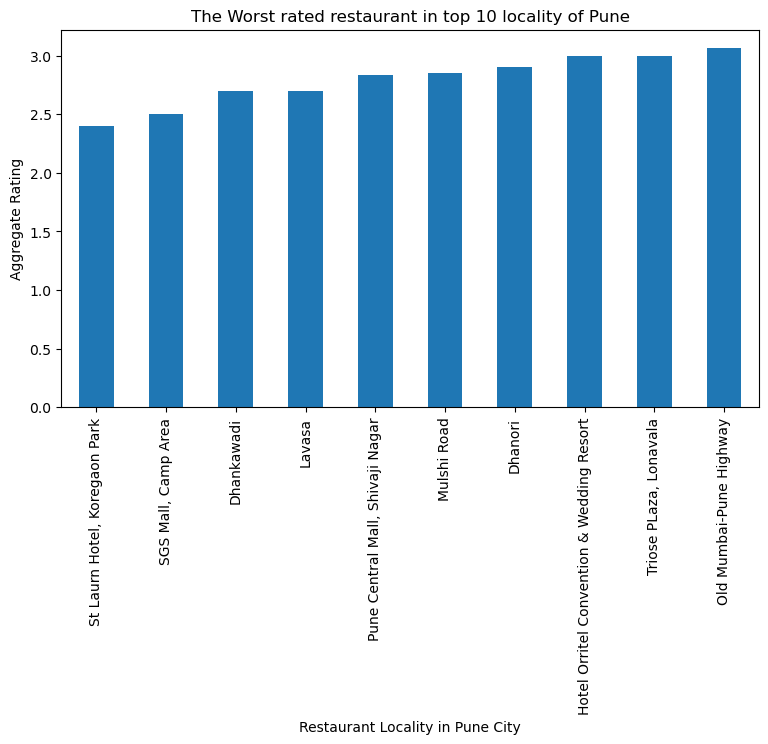

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restaurants are available in <b>St Laun Koregaon Park.</b>

## Which place has more number of restairants to choose from?

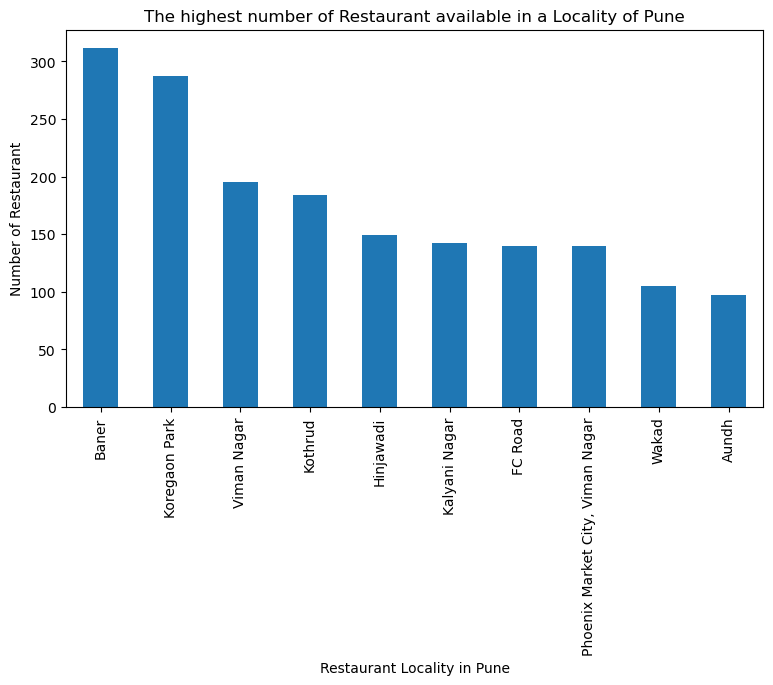

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('The highest number of Restaurant available in a Locality of Pune')

# giving a bar plot
df_resp.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Number of Restaurant')

# displays the plot
plt.show()

<b>Baner</b> is the best places for a person who have lot of restaurants to choose from.

## Which place has less number of Restaurants to choose from in Pune city?

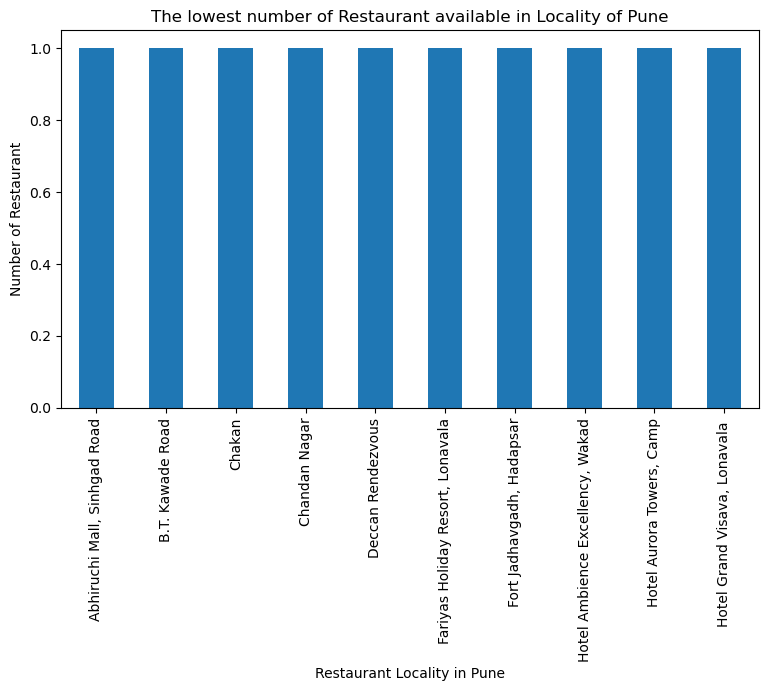

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Pune')
#On x-axis

#giving a bar plot
df_resp.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in Pune')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in Pune city?

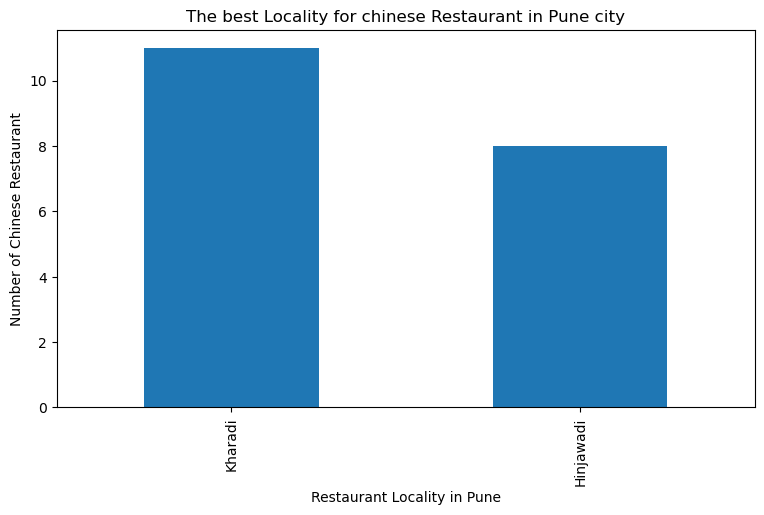

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese Restaurant in Pune city')

#giving a bar plot
# df_Res
df_resp[df_resp['Cuisines'].str.startswith('Chinese')]
df_resp[df_resp['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(2).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Number of Chinese Restaurant')

# displays the plot
plt.show()

<b>Kharadi</b> is the best place for Chinese restaurant.

## which are the best chinese resturants in Pune?  

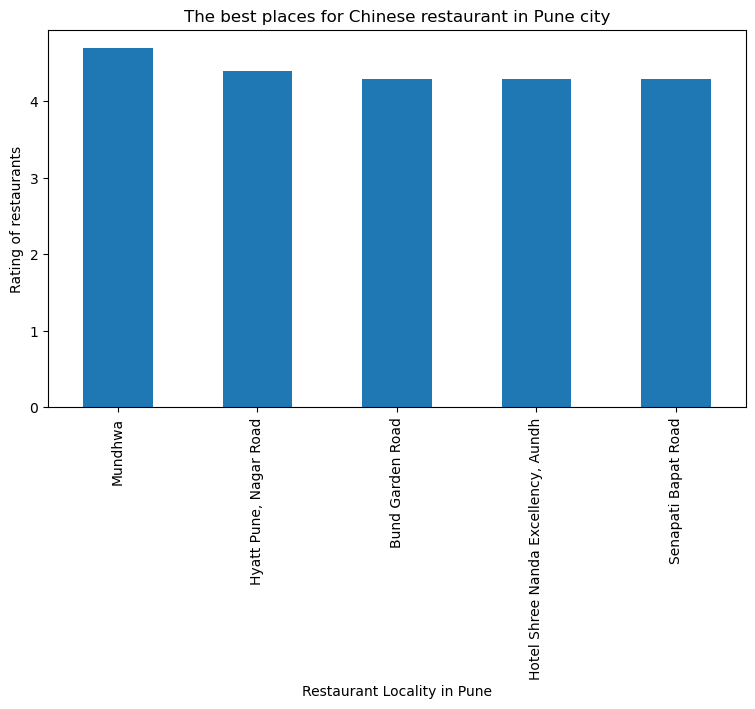

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Pune city')

# giving a bar plot
df_resp[df_resp['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Rating of restaurants')

# displays the plot
plt.show()

Mundwa has the best chinese retaurants in pune

### Which area has more top voted restaurants in pune?

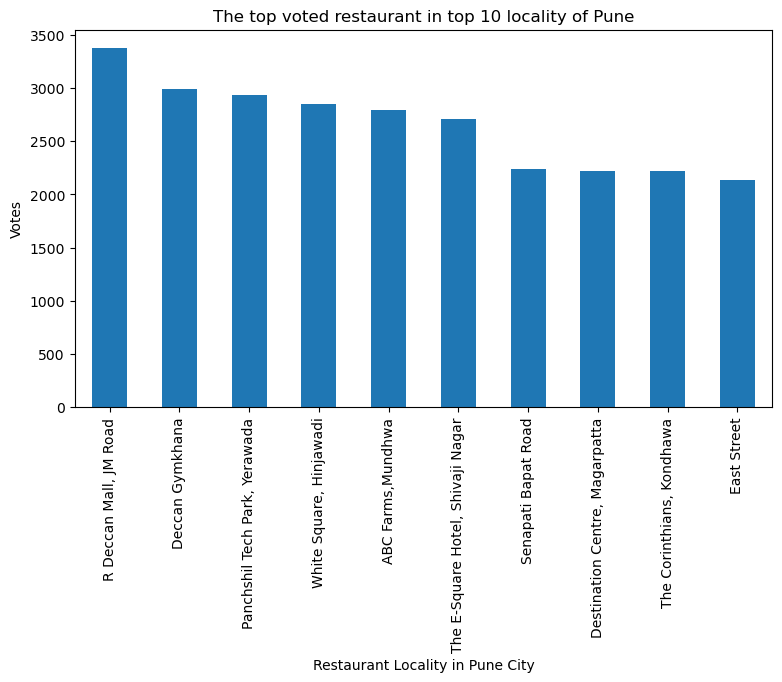

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The top voted restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Votes'].mean().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Votes')

#displays the plot
plt.show()

<b> JM Road</b> has highly voted restaurants in pune.

### Which area has less voted restaurants in pune?

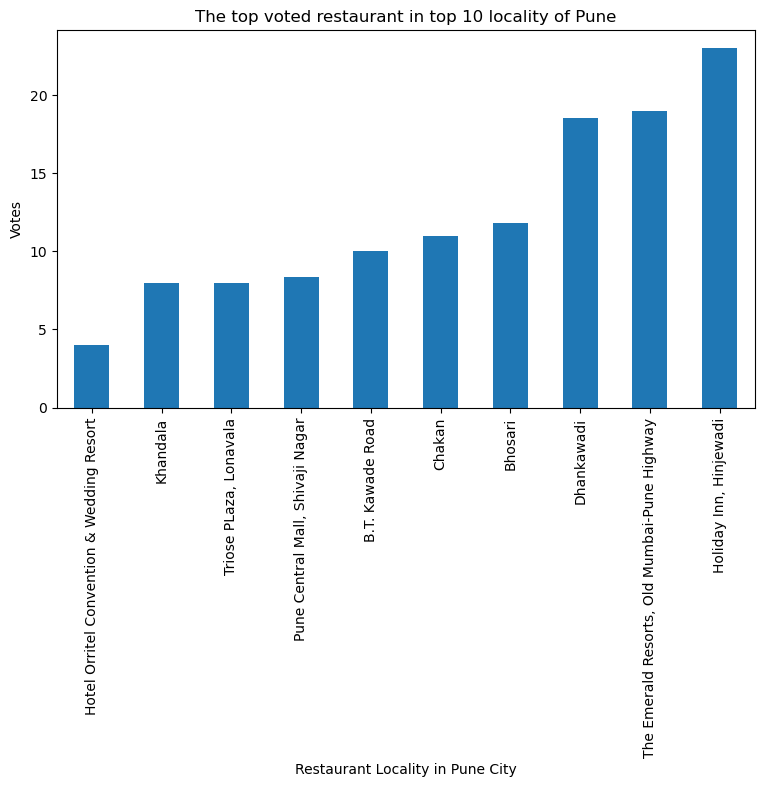

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The top voted restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Votes'].mean().nsmallest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Votes')

#displays the plot
plt.show()

### Data transformation
Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_resp.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_resp.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_resp.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_resp.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_resp.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_resp.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_resp.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0             ABC Farms,Mundhwa  18.539101  73.904827                 6   
1  Abhiruchi Mall, Sinhgad Road  18.463905  73.832473                 1   
2        Aditi Mall, Baner Road  18.558200  73.792624                 4   
3   Aditya Shagun Mall, Bavdhan  18.519293  73.778530                 7   
4                        Akurdi  18.647840  73.769679                16   

                                             Cusines  Agg_Rating  \
0  Iranian, North Indian, Continental, Iranian, N...    4.200000   
1       North Indian, South Indian, Chinese, Biryani    3.300000   
2  Bakery, Desserts, Mughlai, Biryani, North Indi...    3.950000   
3  Chinese, Thai, Malaysian, Indonesian, Asian, N...    3.957143   
4  Chinese, North Indian, Mughlai, Cafe, North In...    3.650000   

                   Comments  No_of_Votes  
0                 Very Good        16740  
1                   Average           38  
2           Good, Very Good         3934  
3      Very Good, Good, Bom         7101  
4  Average, Very Good, Good         3272

In [19]:
df_final.shape

(165, 8)

## Define Foursquare Credentials and Version

In [24]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'CKVICMWQZ5AODEC1D0VI0Y1ZGIJJLFOGI5BZVL54VYNNIDOR' # Foursquare ID
CLIENT_SECRET = 'SGVNP0XPQMJUZ3THWUDOXBP0YZ4AT2Q0XU0WN4BW3P1SLYWB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CKVICMWQZ5AODEC1D0VI0Y1ZGIJJLFOGI5BZVL54VYNNIDOR
CLIENT_SECRET:SGVNP0XPQMJUZ3THWUDOXBP0YZ4AT2Q0XU0WN4BW3P1SLYWB


## Create a function to repeat the same process to all the Locality in Pune

In [25]:
## create a function to repeat the same process to all the Locality in Pune

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Find all the venues in Pune Locality

In [26]:
# find the venues in all Pune Locality
pune_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ABC Farms,Mundhwa
Abhiruchi Mall, Sinhgad Road
Aditi Mall, Baner Road
Aditya Shagun Mall, Bavdhan
Akurdi
Amanora Town Centre, Hadapsar
Ambrosia Resort and Spa
Aundh
B.T. Kawade Road
Balewadi
Balewadi High Street, Balewadi
Baner
Bavdhan
Bhosale-Shinde Arcade, JM Road
Bhosari
Bhugaon
Bibvewadi
Blue Diamond, Koregaon Park
Budhwar Peth
Bund Garden Road
Camp Area
Chakan
Chandan Nagar
Chinchwad
Citrus Hotel, Pimpri
City Hub @ WTC, Kharadi
CityONE Mall
Club 29, Wakad
Conrad Pune, Bund Garden Road
Courtyard By Marriott, Hinjewadi
Creaticity Mall, Yerawada
Crowne Plaza Pune City Centre, Bund Garden Road
Dange Chowk
Deccan Gymkhana
Deccan Rendezvous
Dehu Road
Della Adventure Resort
Destination Centre, Magarpatta
Dhankawadi
Dhanori
Dhole Patil Road
Dorabjee Mall, NIBM Road, Pune
DoubleTree By Hilton Hotel
East Street
Erandwane
FC Road
Fariyas Holiday Resort, Lonavala
Fatima Nagar
Fort Jadhavgadh, Hadapsar
Four Points by Sheraton, Viman Nagar
Hadapsar
Hinjawadi
Holiday Inn, Hinjewadi
Hotel Ambienc

In [27]:
pune_venues.head()

Locality  Locality Latitude  Locality Longitude         Venue  \
0  ABC Farms,Mundhwa          18.539101           73.904827  High Spirits   
1  ABC Farms,Mundhwa          18.539101           73.904827   Shisha Café   
2  ABC Farms,Mundhwa          18.539101           73.904827        Kangan   
3  ABC Farms,Mundhwa          18.539101           73.904827    The Westin   
4  ABC Farms,Mundhwa          18.539101           73.904827        Burger   

   Venue Latitude  Venue Longitude     Venue Category  
0       18.539401        73.904656                Pub  
1       18.539120        73.904872          Jazz Club  
2       18.539616        73.905948  Indian Restaurant  
3       18.539359        73.906219              Hotel  
4       18.538974        73.904611       Burger Joint

In [28]:
pune_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                     
ABC Farms,Mundhwa                            23                  23     23   
Abhiruchi Mall, Sinhgad Road                  3                   3      3   
Aditi Mall, Baner Road                       31                  31     31   
Aditya Shagun Mall, Bavdhan                   8                   8      8   
Akurdi                                       11                  11     11   
...                                         ...                 ...    ...   
Warje                                         5                   5      5   
Westend Mall, Aundh                          33                  33     33   
White Square, Hinjawadi                       9                   9      9   
Xion Mall, Hinjawadi                         14                  14     14   
Yerawada                                      4                   4      4   

                              Venue Latitude  Venue Longitude  Venue Category  
Locality                                                                       
ABC Farms,Mundhwa                         23               23              23  
Abhiruchi Mall, Sinhgad Road               3                3               3  
Aditi Mall, Baner Road                    31               31              31  
Aditya Shagun Mall, Bavdhan                8                8               8  
Akurdi                                    11               11              11  
...                                      ...              ...             ...  
Warje                                      5                5               5  
Westend Mall, Aundh                       33               33              33  
White Square, Hinjawadi                    9                9               9  
Xion Mall, Hinjawadi                      14               14              14  
Yerawada                                   4                4               4  

[159 rows x 6 columns]

In [29]:
print('There are {} uniques categories.'.format(len(pune_venues['Venue Category'].unique())))

There are 179 uniques categories.


In [30]:
## Analyze Each Locality

# one hot encoding
pune_onehot = pd.get_dummies(pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
pune_onehot['Locality'] = pune_venues['Locality'] 

# move Locality column to the first column
column_list = pune_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
pune_onehot = pune_onehot[column_list]

pune_onehot.head(20)

Locality  ATM  Afghan Restaurant  American Restaurant  Arcade  \
0   ABC Farms,Mundhwa    0                  0                    0       0   
1   ABC Farms,Mundhwa    0                  0                    0       0   
2   ABC Farms,Mundhwa    0                  0                    0       0   
3   ABC Farms,Mundhwa    0                  0                    0       0   
4   ABC Farms,Mundhwa    0                  0                    0       0   
5   ABC Farms,Mundhwa    0                  0                    0       0   
6   ABC Farms,Mundhwa    0                  0                    0       0   
7   ABC Farms,Mundhwa    0                  0                    0       0   
8   ABC Farms,Mundhwa    0                  0                    0       0   
9   ABC Farms,Mundhwa    0                  0                    0       0   
10  ABC Farms,Mundhwa    0                  0                    0       0   
11  ABC Farms,Mundhwa    0                  0                    0       0   
12  ABC Farms,Mundhwa    0                  0                    0       0   
13  ABC Farms,Mundhwa    0                  0                    0       0   
14  ABC Farms,Mundhwa    0                  0                    0       0   
15  ABC Farms,Mundhwa    0                  0                    0       0   
16  ABC Farms,Mundhwa    0                  0                    0       0   
17  ABC Farms,Mundhwa    0                  0                    0       0   
18  ABC Farms,Mundhwa    0                  0                    0       0   
19  ABC Farms,Mundhwa    0                  0                    0       0   

    Art Gallery  Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0             0                 0                   0                      0   
1             0                 0                   0                      0   
2             0                 0                   0                      0   
3             0                 0                   0                      0   
4             0                 0                   0                      0   
5             0                 0                   0                      0   
6             0                 0                   0                      0   
7             0                 0                   0                      0   
8             0                 0                   0                      0   
9             0                 0                   0                      0   
10            0                 0                   0                      0   
11            0                 0                   0                      0   
12            0                 0                   0                      0   
13            0                 0                   0                      0   
14            0                 0                   0                      0   
15            0                 0                   0                      0   
16            0                 0                   0                      0   
17            0                 0                   0                      0   
18            0                 0                   0                      0   
19            0                 0                   0                      0   

    BBQ Joint  ...  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0           0  ...      0              0                              0   
1           0  ...      0              0                              0   
2           0  ...      0              0                              0   
3           0  ...      0              0                              0   
4           0  ...      0              0                              0   
5           0  ...      0              0                              0   
6           0  ...      0              0                              0   
7           0  ...      0              0                              0   
8           0  ...

In [31]:
pune_grouped = pune_onehot.groupby('Locality').mean().reset_index()
pune_grouped

Locality   ATM  Afghan Restaurant  \
0               ABC Farms,Mundhwa  0.00                0.0   
1    Abhiruchi Mall, Sinhgad Road  0.00                0.0   
2          Aditi Mall, Baner Road  0.00                0.0   
3     Aditya Shagun Mall, Bavdhan  0.00                0.0   
4                          Akurdi  0.00                0.0   
..                            ...   ...                ...   
154                         Warje  0.00                0.0   
155           Westend Mall, Aundh  0.00                0.0   
156       White Square, Hinjawadi  0.00                0.0   
157          Xion Mall, Hinjawadi  0.00                0.0   
158                      Yerawada  0.25                0.0   

     American Restaurant  Arcade  Art Gallery  Asian Restaurant  \
0               0.000000     0.0          0.0          0.000000   
1               0.000000     0.0          0.0          0.000000   
2               0.000000     0.0          0.0          0.000000   
3               0.000000     0.0          0.0          0.125000   
4               0.000000     0.0          0.0          0.090909   
..                   ...     ...          ...               ...   
154             0.000000     0.0          0.0          0.000000   
155             0.000000     0.0          0.0          0.000000   
156             0.000000     0.0          0.0          0.000000   
157             0.071429     0.0          0.0          0.000000   
158             0.000000     0.0          0.0          0.000000   

     Athletics & Sports  Australian Restaurant  BBQ Joint  ...  Trail  \
0                   0.0                    0.0        0.0  ...    0.0   
1                   0.0                    0.0        0.0  ...    0.0   
2                   0.0                    0.0        0.0  ...    0.0   
3                   0.0                    0.0        0.0  ...    0.0   
4                   0.0                    0.0        0.0  ...    0.0   
..                  ...                    ...        ...  ...    ...   
154                 0.0                    0.0        0.0  ...    0.0   
155                 0.0                    0.0        0.0  ...    0.0   
156                 0.0                    0.0        0.0  ...    0.0   
157                 0.0                    0.0        0.0  ...    0.0   
158                 0.0                    0.0        0.0  ...    0.0   

     Train Station  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0              0.0                       0.000000                    0.0   
1              0.0                       0.000000                    0.0   
2              0.0                       0.000000                    0.0   
3              0.0                       0.000000                    0.0   
4              0.0                       0.000000                    0.0   
..             ...                            ...                    ...   
154            0.0                       0.000000                    0.0   
155            0.0                       0.030303                    0.0   
156            0.0                       0.000000                    0.0   
157            0.0                       0.000000                    0.0   
158            0.0                       0.000000                    0.0   

     Watch Shop  Wedding Hall  Whisky Bar  Wine Shop  Women's Store  \
0           0.0           0.0    0.000000        0.0            0.0   
1           0.0           0.0    0.000000        0.0            0.0   
2           0.0           0.0    0.032258        0.0            0.0   
3           0.0           0.0    0.000000        0.0            0.0   
4           0.0           0.0    0.000000        0.0            0.0   
..          ...           ...         ...        ...            ...   
154         0.0           0.0    0.000000        0.0            0.0   
155         0.0           0.0    0.000000        0.0            0.0   
156         0.0           0.0    0.000000     

In [32]:
pune_grouped.shape

(159, 180)

In [33]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in pune_grouped['Locality']:
    print("----"+hood+"----")
    temp = pune_grouped[pune_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABC Farms,Mundhwa----
                venue  freq
0  Italian Restaurant  0.13
1           Nightclub  0.09
2              Lounge  0.09
3   Indian Restaurant  0.09
4        Dessert Shop  0.04


----Abhiruchi Mall, Sinhgad Road----
                  venue  freq
0        Breakfast Spot  0.33
1            Restaurant  0.33
2  Fast Food Restaurant  0.33
3                   ATM  0.00
4                Office  0.00


----Aditi Mall, Baner Road----
                     venue  freq
0        Indian Restaurant  0.19
1  South Indian Restaurant  0.10
2                     Café  0.10
3             Dessert Shop  0.06
4           Ice Cream Shop  0.06


----Aditya Shagun Mall, Bavdhan----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.12
2               Café  0.12
3   Asian Restaurant  0.12
4        Pizza Place  0.12


----Akurdi----
                       venue  freq
0                       Café  0.18
1                        Gym  0.18
2       Fast Food Restaurant  0.18

In [34]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = pune_grouped['Locality']

for ind in np.arange(pune_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0               ABC Farms,Mundhwa    Italian Restaurant   
1    Abhiruchi Mall, Sinhgad Road        Breakfast Spot   
2          Aditi Mall, Baner Road     Indian Restaurant   
3     Aditya Shagun Mall, Bavdhan                Bakery   
4                          Akurdi                  Café   
..                            ...                   ...   
154                         Warje     Indian Restaurant   
155           Westend Mall, Aundh     Indian Restaurant   
156       White Square, Hinjawadi     Indian Restaurant   
157          Xion Mall, Hinjawadi                 Hotel   
158                      Yerawada                   ATM   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Indian Restaurant             Nightclub                Lounge   
1                 Restaurant  Fast Food Restaurant           Yoga Studio   
2    South Indian Restaurant                  Café          Dessert Shop   
3          Indian Restaurant      Asian Restaurant           Pizza Place   
4       Fast Food Restaurant                   Gym            Food Truck   
..                       ...                   ...                   ...   
154              Pizza Place                 Diner           Coffee Shop   
155     Fast Food Restaurant                Bakery         Shopping Mall   
156               Restaurant              Tea Room       Other Nightlife   
157        Indian Restaurant            Restaurant    Chinese Restaurant   
158                Gastropub           Golf Course                Buffet   

    5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
0           Shopping Mall                        Pub           Pizza Place   
1      English Restaurant                 Food Truck            Food Court   
2          Ice Cream Shop                        Gym     Mobile Phone Shop   
3                    Café             Sandwich Place                   Bar   
4         Thai Restaurant  Middle Eastern Restaurant      Asian Restaurant   
..                    ...                        ...                   ...   
154  Fast Food Restaurant         Falafel Restaurant            Food Truck   
155          Dessert Shop             Ice Cream Shop         Grocery Store   
156         Shopping Mall             Breakfast Spot        Ice Cream Shop   
157             Multiplex                       Café            Food Truck   
158    Falafel Restaurant                 Food Truck            Food Court   

    8th Most Common Venue            9th Most Common Venue  \
0         Other Nightlife                     Dessert Shop   
1       Food & Drink Shop                             Food   
2             Snack Place  Molecular Gastronomy Restaurant   
3              Distillery                       Donut Shop   
4             Coffee Shop                       Food Court   
..                    ...                              ...   
154            Food Court                Food & Drink Shop   
155            Restaurant                    Jewelry Store   
156    Athletics & Sports               Falafel Restaurant   
157      Department Store               Italian Restaurant   
158     Food & Drink Shop                             Food   

    10th Most Common Venue  
0     Fast Food Restaurant  
1              Flower Shop  
2          Bubble Tea Shop  
3         Department Store  
4        Food & Drink Shop  
..                     ...  
154                   Food  
155             Food Court  
156      French Restaurant  
157    American Restaurant  
158            Flower Shop  

[159 rows x 11 columns]

In [37]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

pune_clustering = pune_grouped.drop('Locality', 1)
pune_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pune_clustering)

# check cluster labels generated for each row in the dataframe
kmeans
kmeans.labels_.shape

(159,)

In [38]:
# add clustering labels
pune_merged = df_final.head(159)
pune_merged['Cluster Labels'] = kmeans.labels_
#merge pune_grouped with df_Chinese to add latitude/longitude for each Locality
pune_merged = pune_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

pune_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0             ABC Farms,Mundhwa  18.539101  73.904827                 6   
1  Abhiruchi Mall, Sinhgad Road  18.463905  73.832473                 1   
2        Aditi Mall, Baner Road  18.558200  73.792624                 4   
3   Aditya Shagun Mall, Bavdhan  18.519293  73.778530                 7   
4                        Akurdi  18.647840  73.769679                16   

                                             Cusines  Agg_Rating  \
0  Iranian, North Indian, Continental, Iranian, N...    4.200000   
1       North Indian, South Indian, Chinese, Biryani    3.300000   
2  Bakery, Desserts, Mughlai, Biryani, North Indi...    3.950000   
3  Chinese, Thai, Malaysian, Indonesian, Asian, N...    3.957143   
4  Chinese, North Indian, Mughlai, Cafe, North In...    3.650000   

                   Comments  No_of_Votes  Cluster Labels  \
0                 Very Good        16740               1   
1                   Average           38               1   
2           Good, Very Good         3934               1   
3      Very Good, Good, Bom         7101               1   
4  Average, Very Good, Good         3272               1   

  1st Most Common Venue    2nd Most Common Venue 3rd Most Common Venue  \
0    Italian Restaurant        Indian Restaurant             Nightclub   
1        Breakfast Spot               Restaurant  Fast Food Restaurant   
2     Indian Restaurant  South Indian Restaurant                  Café   
3                Bakery        Indian Restaurant      Asian Restaurant   
4                  Café     Fast Food Restaurant                   Gym   

  4th Most Common Venue 5th Most Common Venue      6th Most Common Venue  \
0                Lounge         Shopping Mall                        Pub   
1           Yoga Studio    English Restaurant                 Food Truck   
2          Dessert Shop        Ice Cream Shop                        Gym   
3           Pizza Place                  Café             Sandwich Place   
4            Food Truck       Thai Restaurant  Middle Eastern Restaurant   

  7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place       Other Nightlife   
1            Food Court     Food & Drink Shop   
2     Mobile Phone Shop           Snack Place   
3                   Bar            Distillery   
4      Asian Restaurant           Coffee Shop   

             9th Most Common Venue 10th Most Common Venue  
0                     Dessert Shop   Fast Food Restaurant  
1                             Food            Flower Shop  
2  Molecular Gastronomy Restaurant        Bubble Tea Shop  
3                       Donut Shop       Department Store  
4                       Food Court      Food & Drink Shop

In [39]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pune_merged['Lat'], pune_merged['Lng'], pune_merged['Locality'], pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
## Examine Clusters

## Cluster 1
pune_merged.loc[pune_merged['Cluster Labels'] == 0, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating                                           Comments  \
15   18.493569    4.300000                         Very Good, Muy Bueno, Good   
35   18.670633    3.366667                                      Good, Average   
45   18.521724    4.145000  Very Good, Excellent, Poor, Average, Good, ÃÂ...   
69   18.631809    3.400000                                            Average   
79   18.585632    4.100000                                          Very Good   
133  18.593741    3.522222                                      Good, Average   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
15         29776               0            Hookah Bar                  Café   
35            93               0                   NaN                   NaN   
45        234046               0     Indian Restaurant            Restaurant   
69            25               0     Indian Restaurant           Pizza Place   
79          2012               0                 Hotel  Fast Food Restaurant   
133        12983               0     Indian Restaurant                Lounge   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
15                 Resort           Yoga Studio    English Restaurant   
35                    NaN                   NaN                   NaN   
45            Coffee Shop          Burger Joint    Chinese Restaurant   
69                  Hotel  Fast Food Restaurant          Dance Studio   
79      Indian Restaurant                 Motel        Sandwich Place   
133                 Diner            Restaurant        Sandwich Place   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
15             Food Court     Food & Drink Shop                  Food   
35                    NaN                   NaN                   NaN   
45            Pizza Place          Dessert Shop        Ice Cream Shop   
69          Shopping Mall  Gym / Fitness Center                   Gym   
79            Chaat Place                  Café           Snack Place   
133  Fast Food Restaurant         Shopping Mall           Snack Place   

    9th Most Common Venue 10th Most Common Venue  
15            Flower Shop   Fast Food Restaurant  
35                    NaN                    NaN  
45         Sandwich Place                 Bakery  
69            Men's Store         Clothing Store  
79             Food Court             Food Truck  
133           Bus Station              Gastropub

In [41]:
## Examine Clusters

## Cluster 2
pune_merged.loc[pune_merged['Cluster Labels'] == 1, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    18.539101    4.200000                                  Very Good   
1    18.463905    3.300000                                    Average   
2    18.558200    3.950000                            Good, Very Good   
3    18.519293    3.957143                       Very Good, Good, Bom   
4    18.647840    3.650000                   Average, Very Good, Good   
..         ...         ...                                        ...   
148  18.407114    3.133333                                 Good, Poor   
153  18.564931    3.987179  Very Good, Average, Good, Excellent, Poor   
154  18.569235    3.300000                              Good, Average   
155  18.591890    4.050000                            Good, Very Good   
158  18.596904    3.997143  Good, Excellent, Poor, Average, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
0          16740               1    Italian Restaurant   
1             38               1        Breakfast Spot   
2           3934               1     Indian Restaurant   
3           7101               1                Bakery   
4           3272               1                  Café   
..           ...             ...                   ...   
148          151               1                Resort   
153       168501               1                  Café   
154          104               1    Chinese Restaurant   
155         1048               1                 Hotel   
158       119323               1     Indian Restaurant   

       2nd Most Common Venue 3rd Most Common Venue  \
0          Indian Restaurant             Nightclub   
1                 Restaurant  Fast Food Restaurant   
2    South Indian Restaurant                  Café   
3          Indian Restaurant      Asian Restaurant   
4       Fast Food Restaurant                   Gym   
..                       ...                   ...   
148                    Hotel     Indian Restaurant   
153        Indian Restaurant           Coffee Shop   
154              Pizza Place          Dessert Shop   
155        Indian Restaurant            Restaurant   
158              Pizza Place                  Café   

             4th Most Common Venue 5th Most Common Venue  \
0                           Lounge         Shopping Mall   
1                      Yoga Studio    English Restaurant   
2                     Dessert Shop        Ice Cream Shop   
3                      Pizza Place                  Café   
4                       Food Truck       Thai Restaurant   
..                             ...                   ...   
148                    Pizza Place                Bakery   
153               Asian Restaurant        Clothing Store   
154  Vegetarian / Vegan Restaurant  Fast Food Restaurant   
155             Chinese Restaurant             Multiplex   
158             Falafel Restaurant            Food Truck   

         6th Most Common Venue            7th Most Common Venue  \
0                          Pub                      Pizza Place   
1                   Food Truck                       Food Court   
2                          Gym                Mobile Phone Shop   
3               Sandwich Place                              Bar   
4    Middle Eastern Restaurant                 Asian Restaurant   
..                         ...                              ...   
148                       Café        Middle Eastern Restaurant   
153                Cheese Shop  Southern / Soul Food Restaurant   
154              Shopping Mall                             Café   
155                       Café                       Food Truck   
158                 Food Court                Food & Drink Shop   

    8th Most Common Venue            9th Most Common Venue  \
0         Other Nightlife                     Dessert Shop   
1       Food & Drink Shop                             Food   
2             Snack Place  Molecular Gastronomy Restaurant   
3             

In [42]:
## Examine Clusters

## Cluster 3
pune_merged.loc[pune_merged['Cluster Labels'] == 2, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating                                           Comments  \
17   18.538373    4.090909                                    Good, Very Good   
19   18.535692    3.971429                           Average, Good, Very Good   
28   18.535462    4.292857                                    Very Good, Good   
29   18.591648    4.233333                         Very Good, Good, Muito Bom   
41   18.467092    3.650000                              Average, Good, Dobrze   
47   18.504228    3.675000                           Very Good, Average, Good   
50   18.503082    3.312500                     Good, Poor, Average, Very Good   
51   18.592469    3.946309     Very Good, Average, Good, Excellent, Poor, Bom   
56   18.551076    3.933333                                    Very Good, Good   
60   18.520188    3.700000                                               Good   
75   18.504623    3.987500          Average, Good, Excellent, Poor, Very Good   
77   18.405528    2.700000                                      Poor, Average   
89   18.468123    3.952174                           Very Good, Average, Good   
108  18.534480    2.833333                                            Average   
124  18.519068    4.081481  Very Good, Good, Excellent, Poor, Average, ÃÂ...   
130  18.339926    3.760000                           Excellent, Poor, Average   
132  18.470709    3.383333                     Good, Poor, Average, Very Good   
136  18.498770    3.970000                           Excellent, Average, Good   
137  18.527529    3.400000                                      Average, Good   
142  18.560216    4.400000                               Very Good, Excellent   
149  18.539517    3.880000                           Very Good, Average, Good   
157  18.575365    3.087500                                Poor, Average, Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
17          3980               2                  Café   
19          2982               2                 Hotel   
28          3715               2                 Hotel   
29          6588               2                 Hotel   
41          3393               2         Shopping Mall   
47           364               2         Shopping Mall   
50          3053               2     Indian Restaurant   
51        189514               2    Mexican Restaurant   
56          3686               2     Indian Restaurant   
60            41               2     Indian Restaurant   
75        115910               2        Ice Cream Shop   
77            78               2     Indian Restaurant   
89         12120               2                  Café   
108           25               2                Lounge   
124        66488               2           Coffee Shop   
130         2857               2     Indian Restaurant   
132         4552               2     Indian Restaurant   
136         7100               2     French Restaurant   
137          296               2                 Hotel   
142         2539               2                  Café   
149         4275               2    Italian Restaurant   
157         1413               2           Snack Place   

             2nd Most Common Venue 3rd Most Common Venue  \
17                           Hotel     Indian Restaurant   
19              Chinese Restaurant     Indian Restaurant   
28              Chinese Restaurant           Yoga Studio   
29               Indian Restaurant            Restaurant   
41             American Restaurant             Multiplex   
47                       Multiplex     Indian Restaurant   
50                     Coffee Shop        Breakfast Spot   
51   Vegetarian / Vegan Restaurant  Fast Food Restaurant   
56                  Ice Cream Shop                  Café   
60              Chinese Restaurant        Ice Cream Shop   
75               Indian Restaurant                  Bank   
77                           Hotel                Resort   
89                   Shopping Ma

In [43]:
## Examine Clusters

## Cluster 4
pune_merged.loc[pune_merged['Cluster Labels'] ==3 , pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
37   18.509601    3.894737  Average, Very Good, Good        42113   
151  18.746866    3.000000                   Average            8   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
37                3     Indian Restaurant  Fast Food Restaurant   
151               3           Pizza Place           Coffee Shop   

    3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
37                 Bakery                   Gym  Middle Eastern Restaurant   
151  Fast Food Restaurant         Shopping Mall                Yoga Studio   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37            Pizza Place        Ice Cream Shop           Coffee Shop   
151    English Restaurant            Food Court     Food & Drink Shop   

    9th Most Common Venue 10th Most Common Venue  
37     Chinese Restaurant       Business Service  
151                  Food            Flower Shop

In [44]:
## Examine Clusters

## Cluster 5
pune_merged.loc[pune_merged['Cluster Labels'] == 4, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating                                           Comments  \
6    18.503555    3.850000                                               Good   
20   18.518210    3.992000                Very Good, Good, Excellent, Average   
24   18.627589    3.400000                                            Average   
30   18.556347    4.200000                                          Very Good   
32   18.612857    3.240000                                      Average, Good   
38   18.464099    2.700000                                      Poor, Average   
42   18.642914    3.766667                                               Good   
48   18.431200    3.600000                                               Good   
52   18.581144    3.500000                                               Good   
58   18.731713    3.000000                                            Average   
66   18.548353    4.330282  Good, Excellent, Very Good, Average, Muy Bueno...   
70   18.563328    4.315385                         Good, Excellent, Very Good   
71   18.759797    3.100000                                            Average   
80   18.603398    3.375000                                 Average, Very Good   
88   18.535601    4.157647    Excellent, Very Good, Good, ÃÂok iyi, Average   
99   18.488905    3.933333                                    Very Good, Good   
106  18.636230    3.150000                                      Poor, Average   
107  18.556612    4.285000            Excellent, Very Good, Good, Sangat Baik   
115  18.595893    3.485714                                      Average, Good   
116  18.593358    3.650000                              Poor, Very Good, Good   
119  18.519570    2.500000                                            Average   
126  18.517961    3.600000                                 Very Good, Average   
128  18.529918    4.137500                                    Very Good, Good   
140  18.537860    4.220000                                          Very Good   
144  18.539899    3.910000                                    Good, Very Good   
150  18.509078    4.375000                                    Good, Excellent   
152  18.602543    3.900000                                    Good, Very Good   
156  18.549496    3.680000                                      Good, Average   

     No_of_Votes  Cluster Labels           1st Most Common Venue  \
6           2002               4               Indian Restaurant   
20         42245               4               Indian Restaurant   
24            54               4               Indian Restaurant   
30          1152               4               Indian Restaurant   
32          2104               4               Indian Restaurant   
38            37               4                     Snack Place   
42           611               4               Indian Restaurant   
48            75               4                             NaN   
52            92               4               Indian Restaurant   
58             4               4  Multicuisine Indian Restaurant   
66        146808               4                            Café   
70         15614               4               Indian Restaurant   
71             8               4                  Breakfast Spot   
80           318               4                        Mountain   
88        132107               4               Indian Restaurant   
99          2577               4                      Playground   
106         1524               4                     Pizza Place   
107        17636               4               Indian Restaurant   
115         2863               4               Indian Restaurant   
116         1302               4              Mexican Restaurant   
119           46               4               Indian Restaurant   
126           80               4               Indian Restaurant   
128         3592               4                        Platform   
140        13550             

### Conclusion 
- The best restarants are available in Kalyani Nagar.
- The worst restaurants are available in St Laun Koregaon Park.
- Baner is the best places with maximum number of restaurants to choose from.
- Abhiruchi Mall, singed road has lowest number of restaurants to choose from
- Kharadi is the best place for Chinese restaurants.
- Mundwa has the best chinese retaurants in pune
- JM Road has Highly voted restaurants in pune.

#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    
### Based on above all conclusions we got to know that which location has the maximum restaurants with high ratings and maximum votes which will definitely help in understnding the best place to open the restaurant
### Based on the clusters we understood that which cluster is best for which kind of restaurent. This help to understnd which kind of restaurant can be opened and in which locality. 
## So above both conclusions can help anyone to understand the right place in pune to open a new restaurent